# Pymaceuticals Inc.
---

### Analysis


1. **Gender Distribution:** The circulation of female and male mice in the review appears to be moderately adjusted, demonstrating that the consequences of the review may not be slanted by orientation predisposition.
2. **Effectiveness of Drug Regimens:** From the outline measurements and representations, apparently certain medication regimens, for example, Capomulin and Ramicane, show below growth volumes contrasted with others. This proposes that these regimens might be more viable in diminishing growth size in mice with squamous cell carcinoma.
3. **Correlation between Mouse Weight and Tumor Volume:** There has all the earmarks of being a positive relationship between's mouse weight and normal noticed cancer volume for the Capomulin routine, as shown by the connection coefficient and the pattern line in the dissipate plot. This proposes that heavier mice will generally have bigger growth volumes, which could be a significant component to think about in treatment results.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mouse = merged_df['Mouse ID'].nunique()
num_mouse

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse= merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'].isin(dup_mouse)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse = cleaned_df["Mouse ID"].nunique()
cleaned_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_advanced = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})
summary_statistics_advanced

,mean,median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

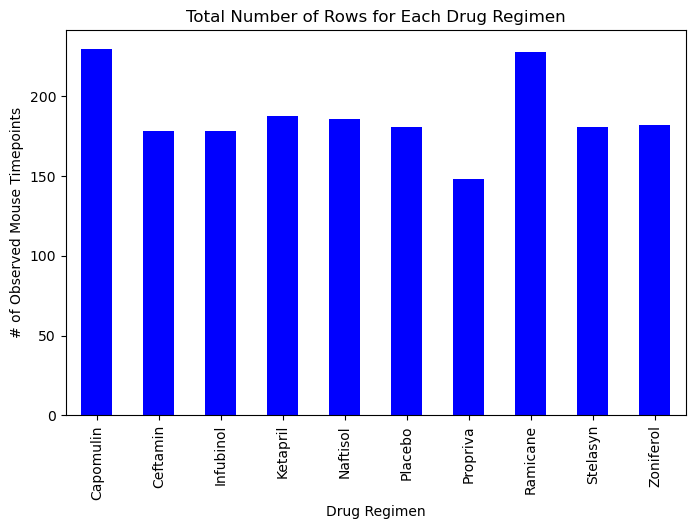

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and count the number of rows
drug_count = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot using Pandas' plot() function
drug_count.plot(kind='bar', color='blue', alpha=1.0, figsize=(8,5), align='center')

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show plot
plt.show()

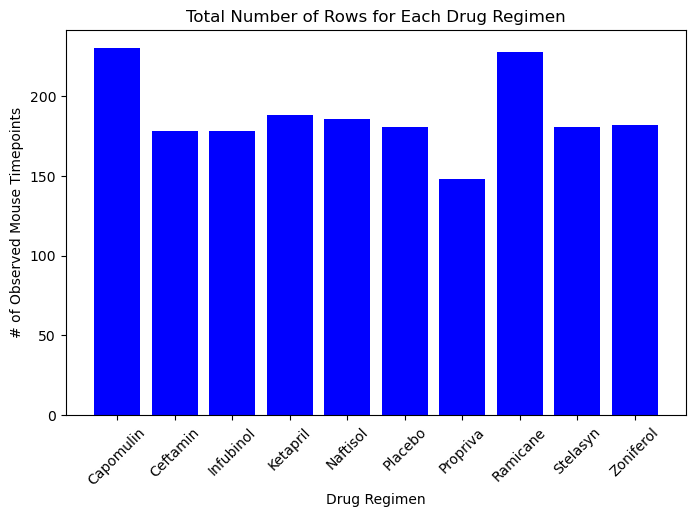

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by 'Drug Regimen' and count the number of rows
drug_count = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot using pyplot
plt.figure(figsize=(8, 5))
plt.bar(drug_count.index, drug_count, color='blue', alpha=1.0, align='center')

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

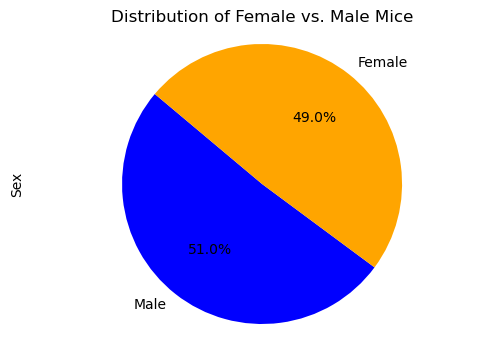

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df['Sex'].value_counts()

# Create a pie plot using Pandas' plot() function
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140, figsize=(6, 4))

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.ylabel('Sex')
# Show plot
plt.show()

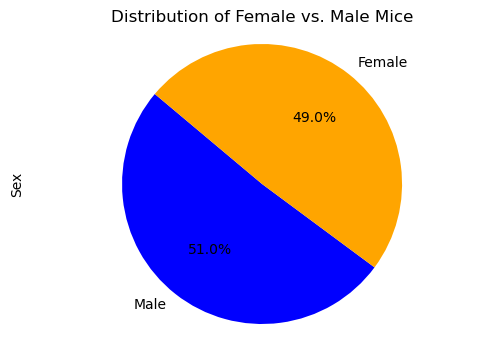

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_df['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.ylabel('Sex')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()

#Merge with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

#Display the DataFrame with the final tumor volume for each mouse
print(merged_last_timepoint.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_last_timepoint.loc[merged_last_timepoint['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volume)
    
    # Determine quartiles
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    
    # Calculate IQR
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


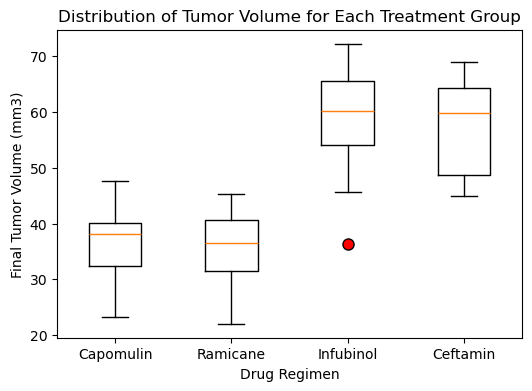

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(6, 4))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

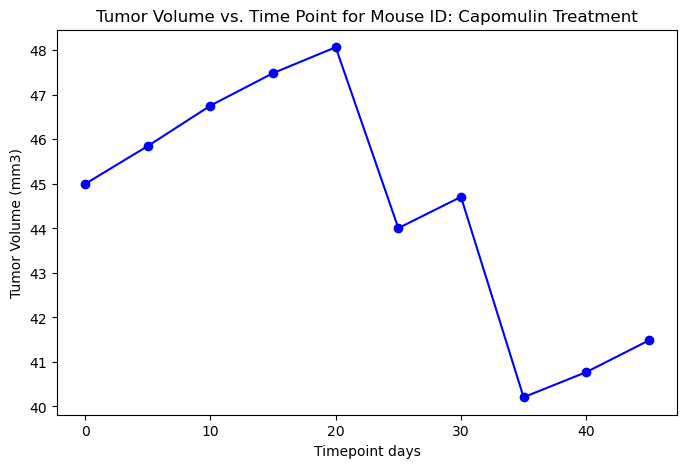

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
selected_mouse_id = 'l509'

# Filter data for the selected mouse treated with Capomulin
selected_mouse_data = cleaned_df[(cleaned_df['Mouse ID'] == selected_mouse_id) & (cleaned_df['Drug Regimen'] == 'Capomulin')]

# Step 3: Create a line plot of tumor volume vs. time point
plt.figure(figsize=(8, 5))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')
plt.title('Tumor Volume vs. Time Point for Mouse ID: Capomulin Treatment')
plt.xlabel('Timepoint days')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

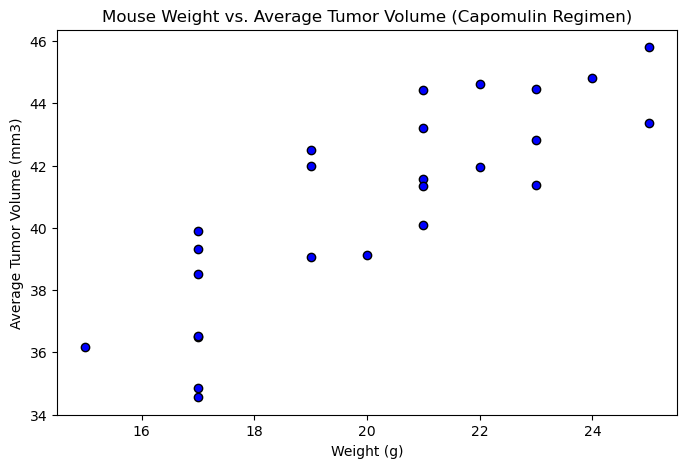

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group data by Mouse ID for the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and mouse weight
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Step 3: Create a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(8, 5))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

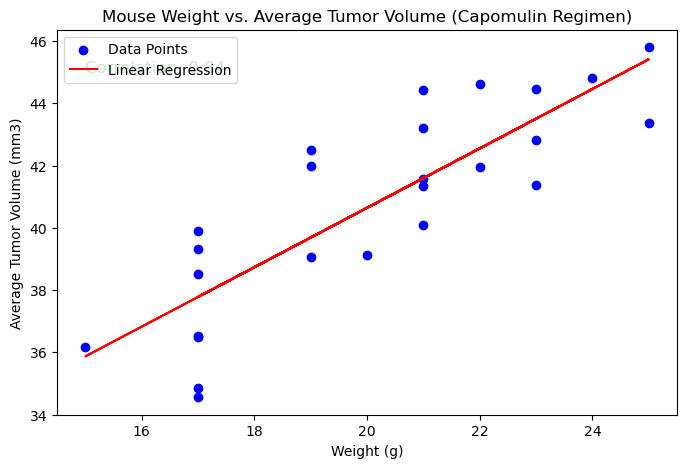

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept = np.polyfit(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], 1)

# Plot scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot line graph representing linear regression model
plt.plot(average_data['Weight (g)'], slope * average_data['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.legend()

# Print correlation coefficient
plt.text(15, 45, f'Correlation: {correlation_coefficient:.2f}', fontsize=12, color='green')

# Display the plot
plt.show()